In [1]:
import intelligent_robotics as ir
import sympy as sp
import numpy as np
import math

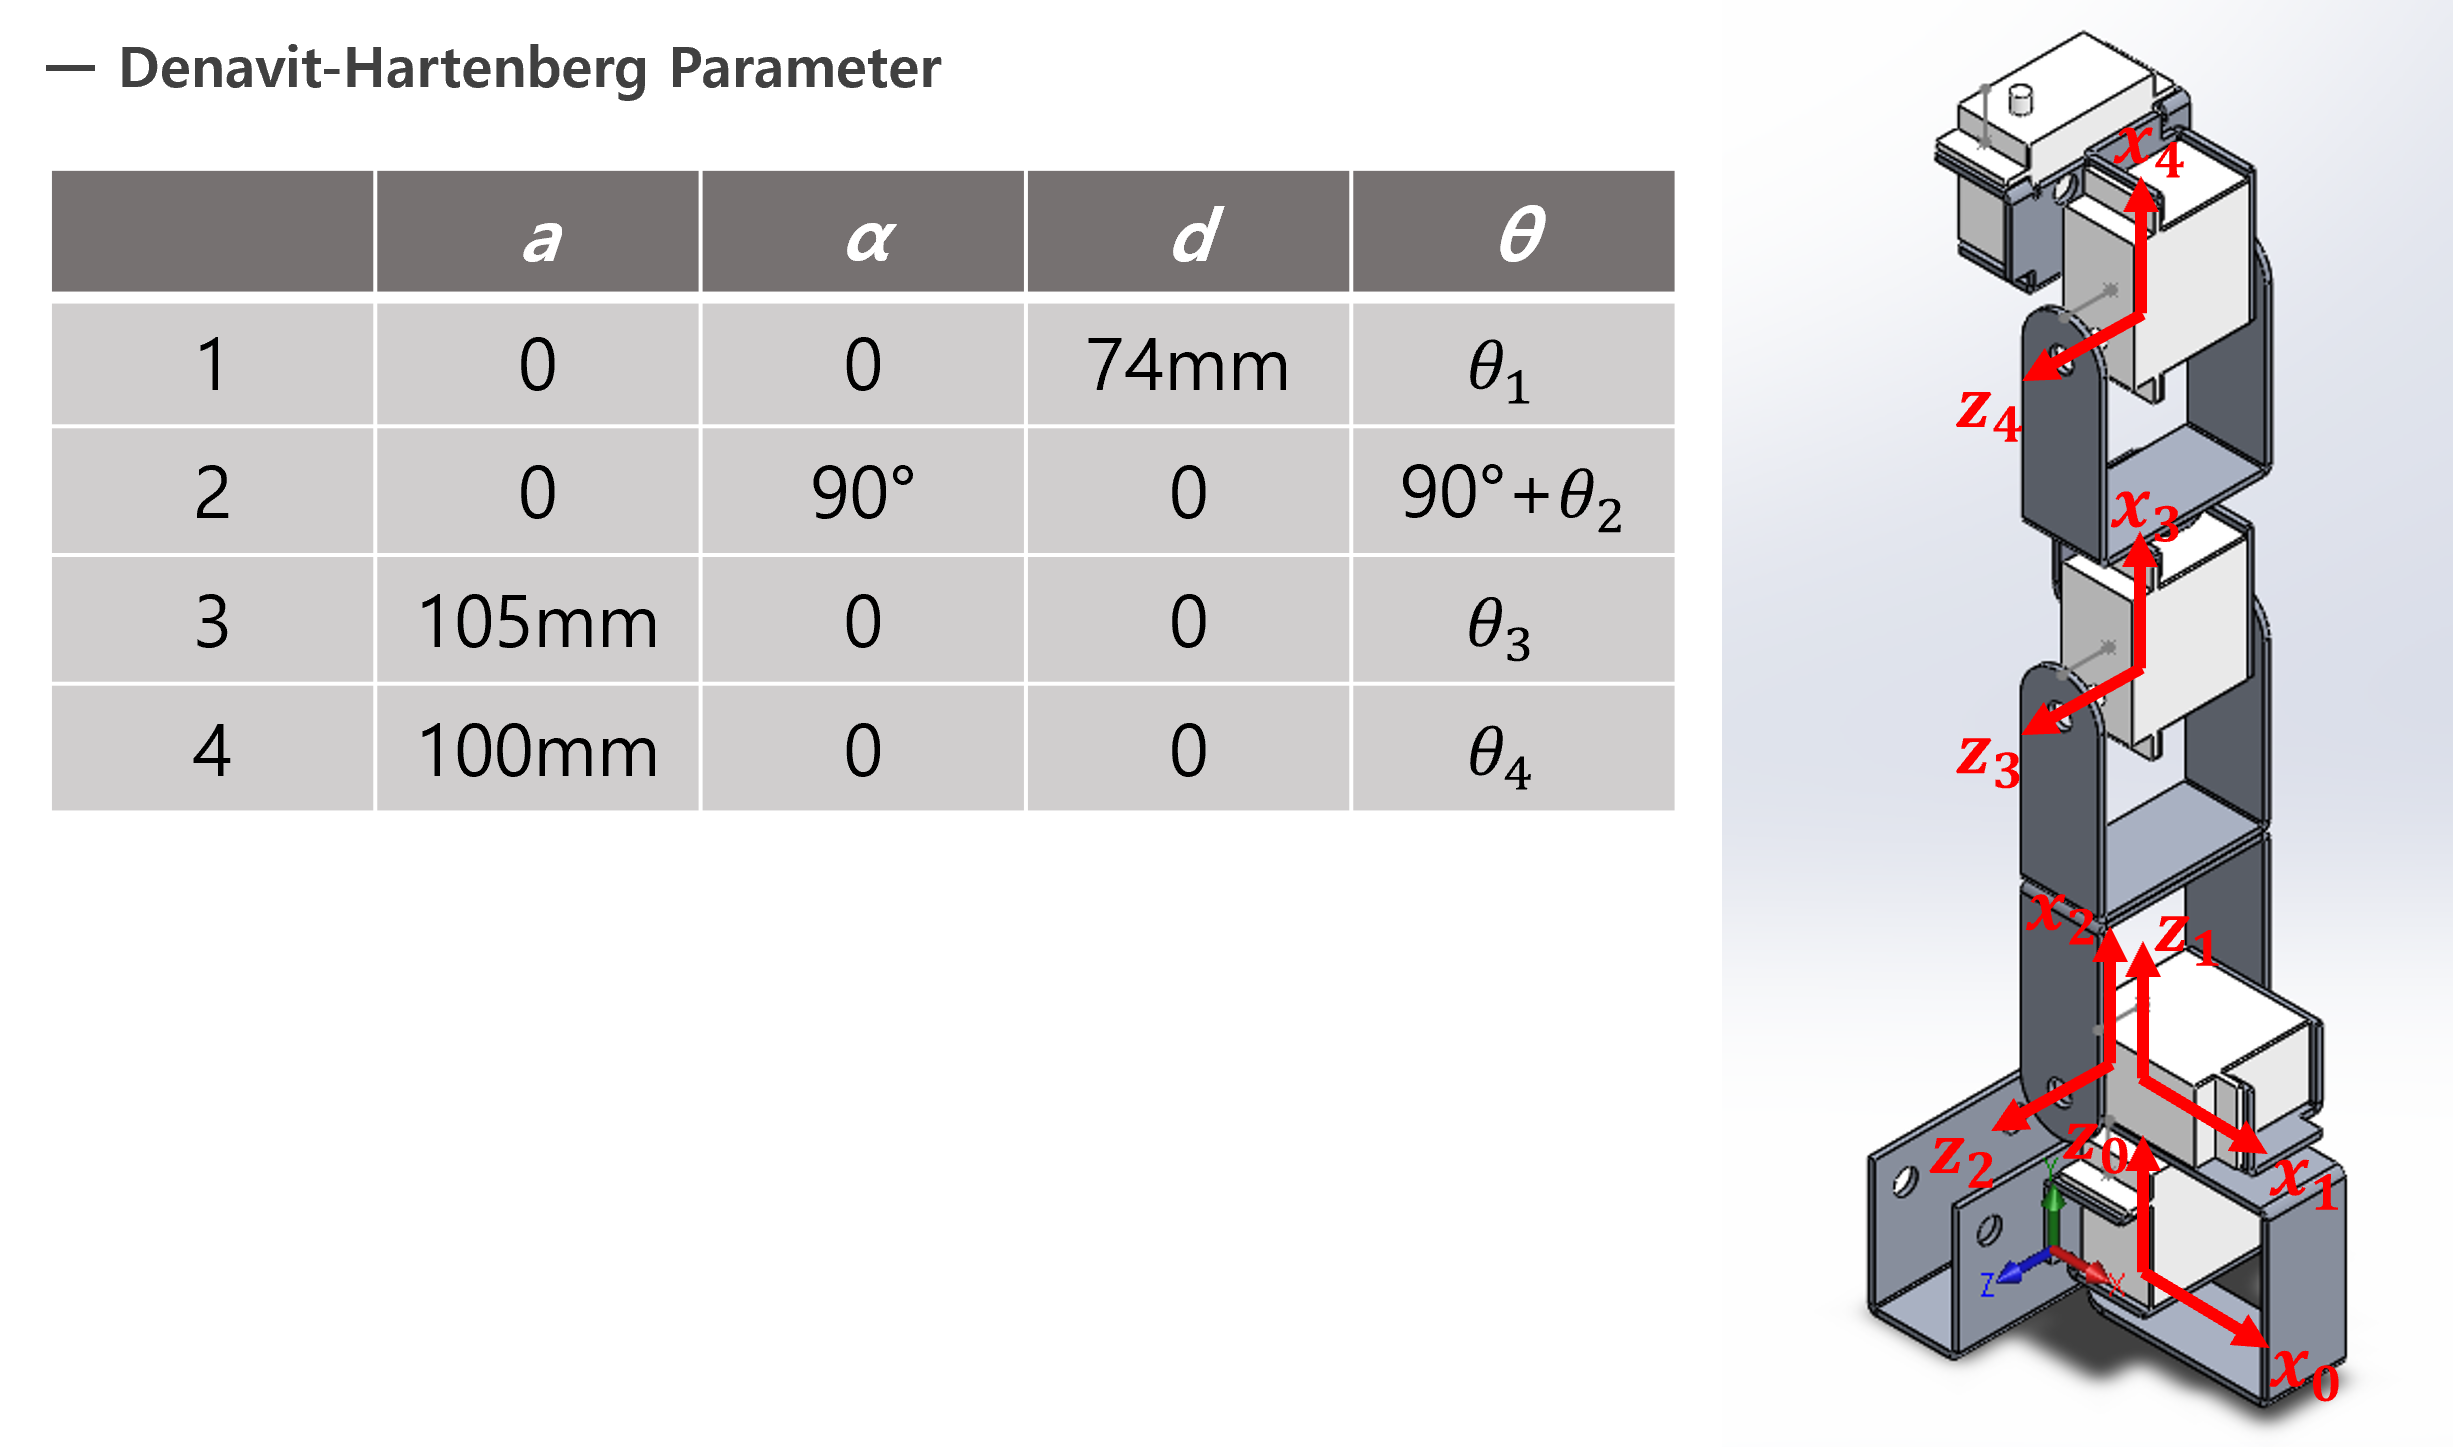

In [2]:
# Problem Define
from IPython.display import Image
Image('figure/4dof_arm_prob.PNG', width=500)

In [3]:
theta1, theta2, theta3, theta4 = ir.dynamicsymbols('theta1, theta2, theta3, theta4')
l1, l2, l3, l4, x, y, z, phi = sp.symbols('l1, l2, l3, l4, x, y, z, phi')
T01 = ir.DH(0, 0, l1, theta1)
T12 = ir.DH(0, sp.pi / 2, 0, sp.pi / 2 + theta2)
T23 = ir.DH(l2, 0, 0, theta3)
T34 = ir.DH(l3, 0, 0, theta4)
T45 = ir.DH(l4, 0, 0, 0)
T05 = sp.simplify(T01 * T12 * T23 * T34 * T45)

In [4]:
T05

Matrix([
[-sin(theta2(t) + theta3(t) + theta4(t))*cos(theta1(t)), -cos(theta2(t) + theta3(t) + theta4(t))*cos(theta1(t)),  sin(theta1(t)), -(l2*sin(theta2(t)) + l3*sin(theta2(t) + theta3(t)) + l4*sin(theta2(t) + theta3(t) + theta4(t)))*cos(theta1(t))],
[-sin(theta2(t) + theta3(t) + theta4(t))*sin(theta1(t)), -sin(theta1(t))*cos(theta2(t) + theta3(t) + theta4(t)), -cos(theta1(t)), -(l2*sin(theta2(t)) + l3*sin(theta2(t) + theta3(t)) + l4*sin(theta2(t) + theta3(t) + theta4(t)))*sin(theta1(t))],
[                cos(theta2(t) + theta3(t) + theta4(t)),                -sin(theta2(t) + theta3(t) + theta4(t)),               0,              l1 + l2*cos(theta2(t)) + l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t))],
[                                                     0,                                                      0,               0,                                                                                                               1]])

In [5]:
w_0_0 = sp.Matrix([[0], [0], [0]])
w_1_1 = ir.get_angular_vel_R(T01, w_0_0, theta1.diff())
w_2_2 = ir.get_angular_vel_R(T12, w_1_1, theta2.diff())
w_3_3 = ir.get_angular_vel_R(T23, w_2_2, theta3.diff())
w_4_4 = ir.get_angular_vel_R(T34, w_3_3, theta4.diff())
w_5_5 = ir.get_angular_vel_R(T45, w_4_4, 0)

v_0_0 = sp.Matrix([[0], [0], [0]])
v_1_1 = ir.get_linear_vel_R(T01, w_0_0, v_0_0)
v_2_2 = ir.get_linear_vel_R(T12, w_1_1, v_1_1)
v_3_3 = ir.get_linear_vel_R(T23, w_2_2, v_2_2)
v_4_4 = ir.get_linear_vel_R(T34, w_3_3, v_3_3)
v_5_5 = ir.get_linear_vel_R(T45, w_4_4, v_4_4)
                             
qd = sp.Matrix([[theta1.diff()], [theta2.diff()], [theta3.diff()], [theta4.diff()]])

w_0_5 = ir.get_R_from_T(T05) * w_5_5
v_0_5 = ir.get_R_from_T(T05) * v_5_5
J_0_5 = ir.get_Jacobian_from_vel(w_0_5, v_0_5, qd)

# Space Jacobian
J_0_5

Matrix([
[ (l2*sin(theta2(t)) + l3*sin(theta2(t) + theta3(t)) + l4*sin(theta2(t) + theta3(t) + theta4(t)))*sin(theta1(t)), -(l2*cos(theta2(t)) + l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t)))*cos(theta1(t)), -(l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t)))*cos(theta1(t)), -l4*cos(theta2(t) + theta3(t) + theta4(t))*cos(theta1(t))],
[-(l2*sin(theta2(t)) + l3*sin(theta2(t) + theta3(t)) + l4*sin(theta2(t) + theta3(t) + theta4(t)))*cos(theta1(t)), -(l2*cos(theta2(t)) + l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t)))*sin(theta1(t)), -(l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t)))*sin(theta1(t)), -l4*sin(theta1(t))*cos(theta2(t) + theta3(t) + theta4(t))],
[                                                                                                              0,                  -l2*sin(theta2(t)) - l3*sin(theta2(t) + theta3(t)) - l4*sin(theta2(t) + theta3(t) + theta4(t)),     

In [6]:
J_0_5[0:3, :]

Matrix([
[ (l2*sin(theta2(t)) + l3*sin(theta2(t) + theta3(t)) + l4*sin(theta2(t) + theta3(t) + theta4(t)))*sin(theta1(t)), -(l2*cos(theta2(t)) + l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t)))*cos(theta1(t)), -(l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t)))*cos(theta1(t)), -l4*cos(theta2(t) + theta3(t) + theta4(t))*cos(theta1(t))],
[-(l2*sin(theta2(t)) + l3*sin(theta2(t) + theta3(t)) + l4*sin(theta2(t) + theta3(t) + theta4(t)))*cos(theta1(t)), -(l2*cos(theta2(t)) + l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t)))*sin(theta1(t)), -(l3*cos(theta2(t) + theta3(t)) + l4*cos(theta2(t) + theta3(t) + theta4(t)))*sin(theta1(t)), -l4*sin(theta1(t))*cos(theta2(t) + theta3(t) + theta4(t))],
[                                                                                                              0,                  -l2*sin(theta2(t)) - l3*sin(theta2(t) + theta3(t)) - l4*sin(theta2(t) + theta3(t) + theta4(t)),     

# Numerical IK

In [7]:
def get_pos_Link_Robot(l1, l2, l3, l4, th1, th2, th3, th4):
    x = -np.cos(th1) * (l2 * np.sin(th2) + l3 * np.sin(th2 + th3) + l4 * np.sin(th2 + th3 + th4))
    y = -np.sin(th1) * (l2 * np.sin(th2) + l3 * np.sin(th2 + th3) + l4 * np.sin(th2 + th3 + th4))
    z = l1 + (l2 * np.cos(th2)) + (l3 * np.cos(th2 + th3)) + l4 * np.cos(th2 + th3 + th4)
    return np.array([x, y, z])

In [8]:
J = J_0_5[0:3, :].subs({l1:75/1000, l2:105/1000, l3:100/1000, l4:110/1000})
#param = {x:150/1000, y:0, z:200/1000}
param = {x:0/1000, y:0, z:0.39}
J

Matrix([
[ (0.1*sin(theta2(t) + theta3(t)) + 0.11*sin(theta2(t) + theta3(t) + theta4(t)) + 0.105*sin(theta2(t)))*sin(theta1(t)), -(0.1*cos(theta2(t) + theta3(t)) + 0.11*cos(theta2(t) + theta3(t) + theta4(t)) + 0.105*cos(theta2(t)))*cos(theta1(t)), -(0.1*cos(theta2(t) + theta3(t)) + 0.11*cos(theta2(t) + theta3(t) + theta4(t)))*cos(theta1(t)), -0.11*cos(theta2(t) + theta3(t) + theta4(t))*cos(theta1(t))],
[-(0.1*sin(theta2(t) + theta3(t)) + 0.11*sin(theta2(t) + theta3(t) + theta4(t)) + 0.105*sin(theta2(t)))*cos(theta1(t)), -(0.1*cos(theta2(t) + theta3(t)) + 0.11*cos(theta2(t) + theta3(t) + theta4(t)) + 0.105*cos(theta2(t)))*sin(theta1(t)), -(0.1*cos(theta2(t) + theta3(t)) + 0.11*cos(theta2(t) + theta3(t) + theta4(t)))*sin(theta1(t)), -0.11*sin(theta1(t))*cos(theta2(t) + theta3(t) + theta4(t))],
[                                                                                                                    0,                  -0.1*sin(theta2(t) + theta3(t)) - 0.11*sin(theta2(t) + theta

In [9]:
# Make function of J(theta)
func_J = sp.lambdify([theta1, theta2, theta3, theta4], J, 'numpy')
func_J

<function _lambdifygenerated(_Dummy_34, _Dummy_33, _Dummy_32, _Dummy_31)>

In [10]:
i = 0
x_des = np.array([0, 0, 0.39])
theta_0 = np.array([0.001, 0.001, 0.001, 0.001])
theta_0[0], theta_0[1], theta_0[2], theta_0[3]

(0.001, 0.001, 0.001, 0.001)

In [11]:
#func_J(theta_0[0], theta_0[1], theta_0[2], theta_0[3])
func_J(0.01, 0.01, 0.01, 0.01)

array([[ 6.34924837e-05, -3.14909508e-01, -2.09920008e-01,
        -1.09945006e-01],
       [-6.34903673e-03, -3.14920006e-03, -2.09927006e-03,
        -1.09948671e-03],
       [ 0.00000000e+00, -6.34935419e-03, -5.29937169e-03,
        -3.29950502e-03]])

In [12]:
epsilon = 1e-10
theta = theta_0
theta_store = theta_0
err = x_des - get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])

while (np.linalg.norm(err) > epsilon):
    J_now = func_J(theta[0], theta[1], theta[2], theta[3])
    m, n = J_now.shape
    if m > n:
        J_inv = np.linalg.inv((J_now.transpose() @ J_now)) @ J_now.transpose()
    if m < n:
        J_inv = J_now.transpose() @ np.linalg.inv((J_now @ J_now.transpose()))
    if m==n:
        J_inv = np.linalg.inv(J_now)
        
    theta = theta + J_inv @ err
    err = x_des - get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])
    theta_store = np.vstack([theta_store, theta])
    i += 1

In [32]:
J_inv

array([[-3.11852767e+06,  3.11852663e+09, -2.95632850e-05],
       [ 4.00000001e+00,  8.95261738e-06,  1.92865833e+05],
       [ 1.32153979e+00, -1.21468729e+03, -2.80846292e+05],
       [ 2.26947820e+00, -1.87807730e+03, -1.61365096e+04]])

In [13]:
err

array([8.83463756e-14, 8.83464050e-17, 2.96988545e-11])

In [14]:
np.linalg.norm(err)

2.9698985890378756e-11

In [15]:
theta_store

array([[ 1.00000000e-03,  1.00000000e-03,  1.00000000e-03,
         1.00000000e-03],
       [ 1.00000000e-03, -3.30024386e-03,  2.75575940e-03,
         4.18970519e-03],
       [ 1.00000000e-03, -1.68303519e-03,  1.46808362e-03,
         2.01689421e-03],
       [ 1.00000000e-03, -8.66296335e-04,  8.03777288e-04,
         9.46273607e-04],
       [ 1.00000000e-03, -4.51315533e-04,  4.55335044e-04,
         4.23127558e-04],
       [ 1.00000000e-03, -2.38327919e-04,  2.67957756e-04,
         1.70928885e-04],
       [ 9.99999999e-04, -1.27106675e-04,  1.63335402e-04,
         5.21651697e-05],
       [ 9.99999999e-04, -6.72612014e-05,  1.01459085e-04,
        -1.08299517e-06],
       [ 9.99999999e-04, -3.35184038e-05,  6.15361732e-05,
        -2.14936283e-05],
       [ 9.99999999e-04, -1.41211809e-05,  3.32904335e-05,
        -2.31165362e-05]])

In [16]:
theta

array([ 9.99999999e-04, -1.41211809e-05,  3.32904335e-05, -2.31165362e-05])

In [17]:
get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])

array([-8.83463756e-14, -8.83464050e-17,  3.90000000e-01])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

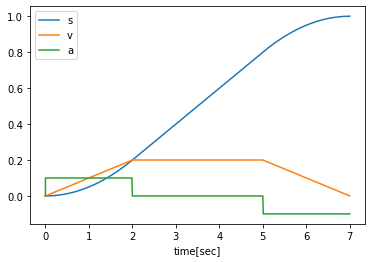

In [19]:
# 속도와 가속도의 최대값을 파라미터로 주고 궤적찾기
time, traj = ir.Trapezoidal_Traj_Gen_Given_Vmax_and_Amax(0.2, 0.1, 0.01)
plt.plot(time, traj)
plt.legend(['s','v','a'])
plt.xlabel('time[sec]')
plt.show()

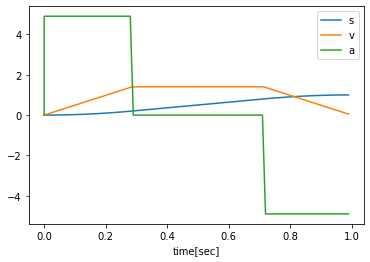

In [20]:
# 속도 최대값과 목표시간을 파라미터로 주고 궤적찾기
time, traj = ir.Trapezoidal_Traj_Gen_Given_Vmax_and_T(1.4, 1, 0.01)
plt.plot(time, traj)
plt.legend(['s','v','a'])
plt.xlabel('time[sec]')
plt.show()

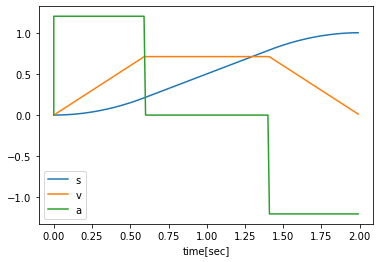

In [21]:
# 기속도 최대값과 목표시간을 파라미터로 주고 궤적찾기
time, traj = ir.Trapezoidal_Traj_Gen_Given_Amax_and_T(1.2, 2, 0.01)
plt.plot(time, traj)
plt.legend(['s','v','a'])
plt.xlabel('time[sec]')
plt.show()

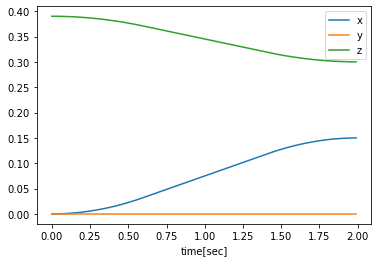

In [22]:
# 목표점이 x = 0.15, y=0, z=0.3 일때
# Cartesian 좌표계 상에서의 trajectory 값을 찾아보자. 
# 가속도는 1.5 m/s2, 시간은 2초일때
time, traj = ir.Trapezoidal_Traj_Gen_Given_Amax_and_T(1.2, 2, 0.01)
x_traj = ir.Path_Gen(0,0.15,traj[:,0])
y_traj = ir.Path_Gen(0,0.,traj[:,0])
z_traj = ir.Path_Gen(0.39,0.3,traj[:,0])
plt.plot(time, x_traj, time, y_traj, time, z_traj)
plt.legend(['x','y','z'])
plt.xlabel('time[sec]')
plt.show()

In [23]:
# 위의 x, y, z 값에 따른 joint space 각도값을 역기구학으로 풀자
# 임의의 radian 결과값을 -pi에서 pi범위의 값으로 변환
def convert_radian_from_npi_to_pi(rad):
    ang = rad
    while math.fabs(ang) >= (np.pi):
        if ang>0:
            ang-=(np.pi*2)
        else:
            ang+=(np.pi*2)
    return ang

# 수치적 역기구학 푸는 함수
def numerical_IK(x_des,th_now):
    epsilon = 1e-10
    
    i = 0
    theta = th_now
    err = x_des - get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])

    while (np.linalg.norm(err) > epsilon):
        J_now = func_J(theta[0], theta[1], theta[2], theta[3])
        m, n = J_now.shape
        if m > n:
            J_inv = np.linalg.inv((J_now.transpose() @ J_now)) @ J_now.transpose()
        if m < n:
            J_inv = J_now.transpose() @ np.linalg.inv((J_now @ J_now.transpose()))
        if m==n:
            J_inv = np.linalg.inv(J_now)
            
        theta = theta + J_inv @ err
        for j in range(len(theta)):
            theta[j] = convert_radian_from_npi_to_pi(theta[j])
        err = x_des - get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, theta[0], theta[1], theta[2], theta[3])
        i += 1
        
    return theta

In [24]:
# 앞에서 만든 Path를 따라 움직이기 위한 Joint Space 각도를 수치적 IK를 이용해 구하기
theta = np.array([0.001,0.001,0.001,0.001])
for index in range(len(time)):
    x_des = np.array([x_traj[index], y_traj[index], z_traj[index]])
    theta = numerical_IK(x_des,theta)
    if index == 0:
        theta_store = theta
    else:
        theta_store = np.vstack([theta_store, theta])

In [25]:
# Goal 지점에서의 역기구학 해. Degree
np.degrees(theta_store[index,:])

array([-8.49792911e-322, -2.35006907e+001,  2.23889371e+001,
       -7.37462015e+001])

In [26]:
# Goal 지점에서의 역기구학 해값을 이용해 다시 정기구학을 풀어서 목표값이 맞는지 확인
get_pos_Link_Robot(75/1000, 105/1000, 100/1000, 110/1000, 
                   theta_store[index,0], theta_store[index,1], theta_store[index,2], theta_store[index,3])

array([ 0.149991 , -0.       ,  0.3000054])

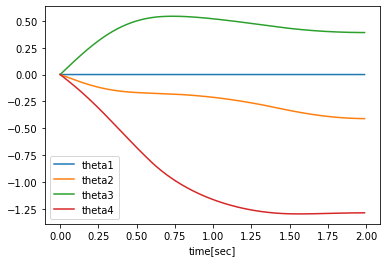

In [27]:
plt.plot(time, theta_store[:,0], time, theta_store[:,1], time, theta_store[:,2], time, theta_store[:,3])
plt.legend(['theta1','theta2','theta3', 'theta4'])
plt.xlabel('time[sec]')
plt.show()

In [28]:
theta_traj = np.degrees(theta_store)

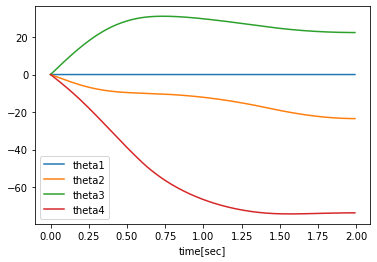

In [29]:
plt.plot(time, theta_traj[:,0], time, theta_traj[:,1], time, theta_traj[:,2], time, theta_traj[:,3])
plt.legend(['theta1','theta2','theta3', 'theta4'])
plt.xlabel('time[sec]')
plt.show()